In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from flatsurf import *
import numpy as np
from matplotlib import pyplot as plt
import os
import pwlf
import sympy as sym
from sympy import Symbol
from sympy import solve, lambdify
import os
from Poincare import *
from Poincare import Section
import math
from surface_dynamics.all import *

In [2]:
#Code from Sunrose
D = OrigamiDatabase()
q = D.query()
qlist = q.list()

def unit_hor_saddle(O):
    count = 0
    for vert in O.vertices():
        tup = vert.up_right_tuple()
        for i in tup:
            for vert2 in O.vertices():
                tup2 = vert2.up_right_tuple()
                if O.r()(i) in tup2:
                    return True
    return False

def is_unobstructed(O):
    cusp_reps = O.teichmueller_curve().cusp_representatives()
    for item in cusp_reps:
        if not unit_hor_saddle(item[0]):
            return False
    return True

def obstructed(n, **kwargs):
    obstructed = []
    count_obstructed = 0
    p = D.query(nb_squares=n, **kwargs)
    for item in p:
        if not is_unobstructed(item):
            obstructed.append(item)
            count_obstructed+= item.teichmueller_curve().orbit_graph().num_verts()
    return (obstructed, count_obstructed)

In [3]:
def vectors(perm, length = 200):
    a = str(perm)
    h, v = a.split("\n")
    S = SymmetricGroup(len(h))
    T = translation_surfaces.origami(S(h), S(v))
    T = T.erase_marked_points()
    sc_list = T.saddle_connections(length)
    slopes_all = []
    for item in sc_list:
        vec = item.holonomy().n()
        direction = item.direction
        if vec not in slopes_all:
            if vec[0] >= -length/20 and vec[0] <= length/20:
                if vec[1] >= -length/20 and vec[1] <= length/20:
                    slopes_all.append(item.holonomy().n())         
    vecs = []
    for vec in slopes_all:
        item = np.array([[vec[0]],[vec[1]]])
        vecs.append(item)
    return vecs

In [4]:
def perms_list(n, **kwargs):
    obstructed = []
    p = D.query(nb_squares=n, **kwargs)
    for item in p:
        if not is_unobstructed(item):
            obstructed.append(item)
            for perm in item.teichmueller_curve():
                obstructed.append(perm)
    return obstructed

In [8]:
permutations = perms_list(6)
permutations

[(1)(2)(3)(4)(5,6)
 (1,2,3,4,5)(6),
 (1)(2)(3)(4)(5,6)
 (1,2,3,4,5)(6),
 (1)(2)(3)(4)(5,6)
 (1,2,3,4,5,6),
 (1)(2)(3)(4,5,6)
 (1,2,3,4)(5)(6),
 (1)(2)(3)(4,5,6)
 (1,2,3,4,5,6),
 (1)(2)(3)(4,5,6)
 (1,2,3,4,6,5),
 (1)(2)(3,4,5,6)
 (1,2,3)(4)(5)(6),
 (1)(2)(3,4,5,6)
 (1,2,3,4,5,6),
 (1)(2)(3,4,5,6)
 (1,2,3,5)(4,6),
 (1)(2)(3,4,5,6)
 (1,2,3,6,5,4),
 (1)(2,3,4,5,6)
 (1,2)(3)(4)(5)(6),
 (1)(2,3,4,5,6)
 (1,2,3,4,5,6),
 (1)(2,3,4,5,6)
 (1,2,4,6,3,5),
 (1)(2,3,4,5,6)
 (1,2,5,3,6,4),
 (1)(2,3,4,5,6)
 (1,2,6,5,4,3),
 (1,2)(3,4,5,6)
 (1,3,2,4,5,6),
 (1,2)(3,4,5,6)
 (1,3,6,5,2,4),
 (1,2)(3,4,5,6)
 (1,3,2,6)(4)(5),
 (1,2)(3,4,5,6)
 (1,3,5,2,6,4),
 (1,2,3,4,5,6)
 (1)(2)(3)(4)(5,6),
 (1,2,3,4,5,6)
 (1)(2)(3)(4,5,6),
 (1,2,3,4,5,6)
 (1)(2)(3)(4,6,5),
 (1,2,3,4,5,6)
 (1)(2)(3,4,5,6),
 (1,2,3,4,5,6)
 (1)(2)(3,6,5,4),
 (1,2,3,4,5,6)
 (1)(2,3,4,5,6),
 (1,2,3,4,5,6)
 (1)(2,4,6,3,5),
 (1,2,3,4,5,6)
 (1)(2,5,3,6,4),
 (1,2,3,4,5,6)
 (1)(2,6,5,4,3),
 (1,2,3,4,5,6)
 (1,2,3,5,4,6),
 (1,2,3,4,5,6)
 (1,2,4,6)(3,5),

In [ ]:
for i in range(len(permutations)):
    n_squares = 6
    perm = permutations[i]
    vecs = vectors(perm,2500)
    comp(perm, vecs, 6, i)

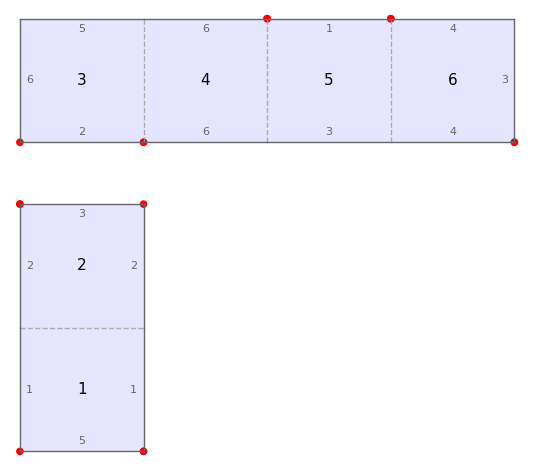

In [13]:
perm = permutations[8]
vecs0 = vectors(perm, 1000)
vecs0.append(np.array([[2],[1]]))
dx = 0.001
alphas, Cs, C_invs, eigs, Ms, generators, eigenvecs = poincare_details(perm, vecs0)
perm.show()

In [14]:
alphas

[4.0, 116.0, 15.0, 145.0, 4.0, 30.0, 60.0, 12.0]

In [ ]:
i = 0
n_squares = 6
index = 0
vecs, x_vals, m0, m1, x0, y0, dx_y = setup(alphas[i], Cs[i], eigs[i], vecs0, dx)
df = winners(vecs, x_vals, m0, m1, y0, dx, dx_y)
plot(df, vecs, Cs[i], 1, n_squares, index, test = True)

2107
148


In [ ]:
sec_list = sec_setup(df, dx_y)
secs = sec_comp(sec_list, dx)
times = time_comp(secs)
pdf(list(df["time"]), times, dx*4)

In [18]:
df

,x,y,lab,vec,time
0,0.006,0.978,135,"[[3.0], [1.0]]",167.336011
1,0.006,0.986,69,"[[1.0], [1.0]]",168.010753
2,0.008,0.968,92,"[[4.0], [1.0]]",125.000000
3,0.008,0.976,135,"[[3.0], [1.0]]",125.000000
4,0.008,0.984,69,"[[1.0], [1.0]]",126.008065
...,...,...,...,...,...
123821,0.998,-0.038,69,"[[1.0], [1.0]]",1.043754
123822,0.998,-0.030,69,"[[1.0], [1.0]]",1.035128
123823,0.998,-0.022,69,"[[1.0], [1.0]]",1.026643
123824,0.998,-0.014,69,"[[1.0], [1.0]]",1.018297


In [26]:
df["lab"].unique()

array([346, 511, 254,  48,  34, 494])

In [56]:
a = df[df["lab"] == 511]
b = a[a["x"] == max(a["x"])]
b

,x,y,lab,vec,time
1993312,0.999,-2.995,511,"[[3.0], [1.0]]",500.500501
1993313,0.999,-2.994,511,"[[3.0], [1.0]]",333.667000
1993314,0.999,-2.993,511,"[[3.0], [1.0]]",250.250250
1993315,0.999,-2.992,511,"[[3.0], [1.0]]",200.200200
1993316,0.999,-2.991,511,"[[3.0], [1.0]]",166.833500
...,...,...,...,...,...
1994306,0.999,-2.001,511,"[[3.0], [1.0]]",1.005021
1994307,0.999,-2.000,511,"[[3.0], [1.0]]",1.004013
1994308,0.999,-1.999,511,"[[3.0], [1.0]]",1.003007
1994309,0.999,-1.998,511,"[[3.0], [1.0]]",1.002003


In [31]:
x0

1.0

In [32]:
y0

1.0

In [11]:
G = SymmetricGroup(2)

In [12]:
perm = translation_surfaces.origami(G('(1)'), G('(1)'))